<a href="https://colab.research.google.com/github/barauna-lo/Neurocomputing/blob/main/Project_02_SOM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[<img src=https://raw.githubusercontent.com/barauna-lo/CAP4213-Deep-Learning/main/logoinpe.png align=”middle”>](https://www.gov.br/inpe/pt-br)

[<center><img src="https://github.com/barauna-lo/Deep-Learning/blob/main/LogoCAP.png?raw=true" width = 450 align="middle"></center>](http://www.inpe.br/posgraduacao/cap/)


# Project 02 - Self-Organizing Map (SOM)

* [Luan Orion Baraúna](https://www.linkedin.com/in/luan-orion-barauna/)


## PROJETO 2 – APRENDIZADO NÃO SUPERVISIONADO

1. Selecionar pelo menos dois datasets:

2. Aplicar um modelo neural não supervisionado

3. Avaliar os padrões detectados em cada conjunto:

4. Clusters / outliers, etc.

5. Avaliar a homogeneidade dos agrupamentos

6. Variar os parâmetros do modelo (grid, taxas, número
de neurônios, etc.)



# Introdução 

Para a realização deste caderno irei utilizar como referência o [trabalho](https://www.kaggle.com/code/phelpsmemo/cap-351-neurocomputacao-projeto2-som) de Felipe Menino Carlos disponível no Kaggle como referência. 

Ele utilizou o `minisom`, uma biblioteca do python que possuim a implementação algorítimo SOM no seu backend disponível no [Github](https://github.com/JustGlowing/minisom).

Os dados que irei utlizar foram acessados no UCI Machine Learning Data Set e refere-se aos dados de [Diabetes 130-US hospitals for years 1999-2008 Data Set](https://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008)



In [1]:
!pip install minisom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for minisom: filename=MiniSom-2.3.0-py3-none-any.whl size=9018 sha256=a69420f9adfe0b1c4334e8669e76be7f89e2747206f82a58454bfcef25c64a98
  Stored in directory: /root/.cache/pip/wheels/d4/ca/4a/488772b0399fec45ff53132ed14c948dec4b30deee3a532f80
Successfully built minisom


In [2]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00296/dataset_diabetes.zip
!unzip "dataset_diabetes.zip" -d "/content/"

--2022-07-19 20:20:49--  https://archive.ics.uci.edu/ml/machine-learning-databases/00296/dataset_diabetes.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3347213 (3.2M) [application/x-httpd-php]
Saving to: ‘dataset_diabetes.zip’

dataset_diabetes.zi 100%[===================>]   3.19M  9.02MB/s    in 0.4s    

2022-07-19 20:20:50 (9.02 MB/s) - ‘dataset_diabetes.zip’ saved [3347213/3347213]



In [6]:
cd dataset_diabetes/

/content/dataset_diabetes


In [7]:
import pandas as pd
import seaborn as sns

In [10]:
df = pd.read_csv('diabetic_data.csv')

In [20]:
#Print aos colluns information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [17]:
 df pd.get_dummies(train, dummy_na=True, columns=['Pclass', 'Sex', 'Embarked']).astype(float)

AttributeError: ignored

In [15]:
df.drop

features = nasa_dataset.drop(['id', 'name', 'orbiting_body', 'sentry_object'], axis=1)
features.head()



,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [ ]:
from sklearn_som.som import SOM

from sklearn import datasets

iris = datasets.load_iris()
iris_data = iris.data[:, :2]
iris_label = iris.target

In [ ]:
iris_som = SOM(m=3, n=1, dim=2)
iris_som.fit(iris_data)

In [ ]:
predictions = iris_som.predict(iris_data)

In [ ]:
predictions = iris_som.predict(iris_data)

In [ ]:
type(iris)

sklearn.utils.Bunch

In [ ]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


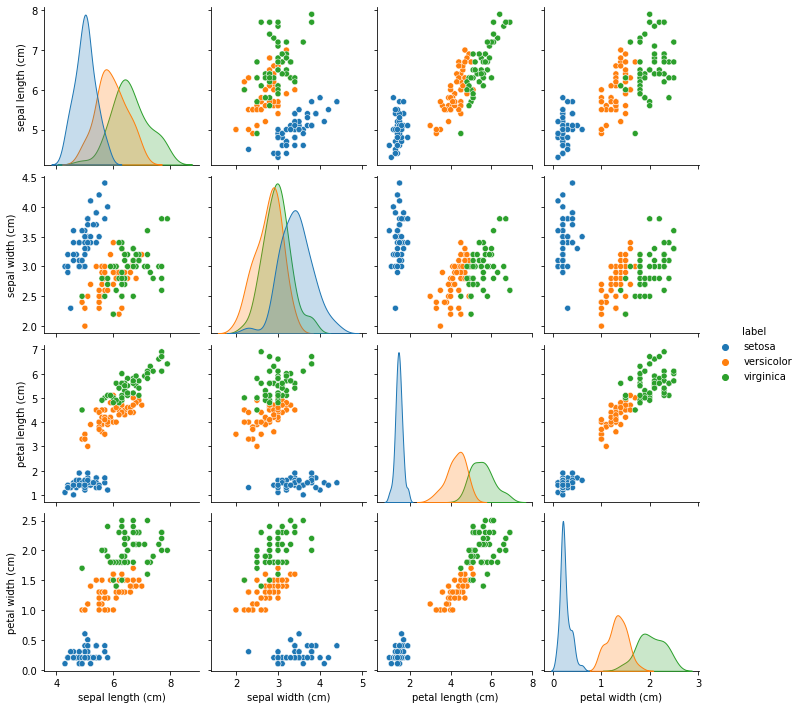

In [ ]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df['label'] = [iris.target_names[i] for i in iris.target]

sns.pairplot(df, hue = 'label')


# References

[HAYKIN, Simon. Redes Neurais: Princípios e prática. Porto Alegre
RS:Bookman, 2001.](https://www.amazon.com.br/Redes-Neurais-Princ%C3%ADpios-Simon-Haykin-ebook/dp/B073QSG69Y)

http://alexlenail.me/NN-SVG/index.html

https://towardsdatascience.com/why-data-should-be-normalized-before-training-a-neural-network-c626b7f66c7d

https://medium.com/analytics-vidhya/how-to-download-kaggle-datasets-into-google-colab-via-google-drive-dcb348d7af07

https://towardsdatascience.com/deep-learning-which-loss-and-activation-functions-should-i-use-ac02f1c56aa8

https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/